In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
co_df=pd.read_csv("covid.csv")
co_df

,Patient_ID,Age,Test_Result,Hospitalized,Oxygen_Level
0,1.0,Thirty,Deceased,No,NaN
1,2.0,NaN,Recovered,NaN,93.7
2,NaN,94,NEG,YES,97.5
3,4.0,NaN,Deceased,NaN,81.4
4,5.0,89,NEG,YES,?
...,...,...,...,...,...
495,496.0,45.7,NaN,Yes,NaN
496,497.0,45.7,positive,NaN,86.2
497,498.0,17,Positive,NaN,NaN
498,499.0,Thirty,Recovered,Yes,?


In [8]:
co_df.isnull().sum()

Patient_ID       23
Age             172
Test_Result      75
Hospitalized    179
Oxygen_Level    186
dtype: int64

In [9]:
co_df.info()
co_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Patient_ID    477 non-null    float64
 1   Age           328 non-null    object 
 2   Test_Result   425 non-null    object 
 3   Hospitalized  321 non-null    object 
 4   Oxygen_Level  314 non-null    object 
dtypes: float64(1), object(4)
memory usage: 19.7+ KB


,Patient_ID
count,477.000000
mean,251.291405
std,144.455268
min,1.000000
25%,128.000000
50%,251.000000
75%,377.000000
max,500.000000


In [10]:
co_df["Patient_ID"]=pd.to_numeric(co_df["Patient_ID"],errors="coerce")
co_df["Age"]=pd.to_numeric(co_df["Age"],errors="coerce")
co_df["Oxygen_Level"]=pd.to_numeric(co_df["Oxygen_Level"],errors="coerce")
co_df

,Patient_ID,Age,Test_Result,Hospitalized,Oxygen_Level
0,1.0,NaN,Deceased,No,NaN
1,2.0,NaN,Recovered,NaN,93.7
2,NaN,94.0,NEG,YES,97.5
3,4.0,NaN,Deceased,NaN,81.4
4,5.0,89.0,NEG,YES,NaN
...,...,...,...,...,...
495,496.0,45.7,NaN,Yes,NaN
496,497.0,45.7,positive,NaN,86.2
497,498.0,17.0,Positive,NaN,NaN
498,499.0,NaN,Recovered,Yes,NaN


In [11]:
co_df["Patient_ID"]=range(1,len(co_df)+1)
co_df

,Patient_ID,Age,Test_Result,Hospitalized,Oxygen_Level
0,1,NaN,Deceased,No,NaN
1,2,NaN,Recovered,NaN,93.7
2,3,94.0,NEG,YES,97.5
3,4,NaN,Deceased,NaN,81.4
4,5,89.0,NEG,YES,NaN
...,...,...,...,...,...
495,496,45.7,NaN,Yes,NaN
496,497,45.7,positive,NaN,86.2
497,498,17.0,Positive,NaN,NaN
498,499,NaN,Recovered,Yes,NaN


In [12]:
co_df["Age"].fillna(co_df["Age"].mean(),inplace=True)
co_df["Age"]=co_df["Age"].astype(int)
co_df

C:\Users\Sisiliya\AppData\Local\Temp\ipykernel_37592\2196647184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  co_df["Age"].fillna(co_df["Age"].mean(),inplace=True)


,Patient_ID,Age,Test_Result,Hospitalized,Oxygen_Level
0,1,45,Deceased,No,NaN
1,2,45,Recovered,NaN,93.7
2,3,94,NEG,YES,97.5
3,4,45,Deceased,NaN,81.4
4,5,89,NEG,YES,NaN
...,...,...,...,...,...
495,496,45,NaN,Yes,NaN
496,497,45,positive,NaN,86.2
497,498,17,Positive,NaN,NaN
498,499,45,Recovered,Yes,NaN


In [13]:
co_df["Hospitalized"]=co_df["Hospitalized"].str.replace("YES","Yes")
co_df["Test_Result"]=co_df["Test_Result"].str.replace("NEG","Negative")
co_df

,Patient_ID,Age,Test_Result,Hospitalized,Oxygen_Level
0,1,45,Deceased,No,NaN
1,2,45,Recovered,NaN,93.7
2,3,94,Negative,Yes,97.5
3,4,45,Deceased,NaN,81.4
4,5,89,Negative,Yes,NaN
...,...,...,...,...,...
495,496,45,NaN,Yes,NaN
496,497,45,positive,NaN,86.2
497,498,17,Positive,NaN,NaN
498,499,45,Recovered,Yes,NaN


In [14]:
co_df["Test_Result"].fillna(co_df["Test_Result"].mode()[0], inplace=True)
co_df

C:\Users\Sisiliya\AppData\Local\Temp\ipykernel_37592\1424958641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  co_df["Test_Result"].fillna(co_df["Test_Result"].mode()[0], inplace=True)


,Patient_ID,Age,Test_Result,Hospitalized,Oxygen_Level
0,1,45,Deceased,No,NaN
1,2,45,Recovered,NaN,93.7
2,3,94,Negative,Yes,97.5
3,4,45,Deceased,NaN,81.4
4,5,89,Negative,Yes,NaN
...,...,...,...,...,...
495,496,45,Negative,Yes,NaN
496,497,45,positive,NaN,86.2
497,498,17,Positive,NaN,NaN
498,499,45,Recovered,Yes,NaN


In [15]:
co_df["Test_Result"] = co_df["Test_Result"].str.capitalize()
co_df

,Patient_ID,Age,Test_Result,Hospitalized,Oxygen_Level
0,1,45,Deceased,No,NaN
1,2,45,Recovered,NaN,93.7
2,3,94,Negative,Yes,97.5
3,4,45,Deceased,NaN,81.4
4,5,89,Negative,Yes,NaN
...,...,...,...,...,...
495,496,45,Negative,Yes,NaN
496,497,45,Positive,NaN,86.2
497,498,17,Positive,NaN,NaN
498,499,45,Recovered,Yes,NaN


In [18]:
co_df["Hospitalized"] = np.select(
    [
        co_df["Test_Result"].isin(["Positive", "Deceased"]),
        co_df["Test_Result"].isin(["Negative", "Recovered"]),
        co_df["Test_Result"].isna() & (co_df["Age"] >= 60),
        co_df["Test_Result"].isna() & (co_df["Age"] < 60)
    ],
    [
        "Yes",
        "No",
        "Yes",
        "No"
    ],
    default="Unknown"
)
co_df

,Patient_ID,Age,Test_Result,Hospitalized,Oxygen_Level
0,1,45,Deceased,Yes,NaN
1,2,45,Recovered,No,93.7
2,3,94,Negative,No,97.5
3,4,45,Deceased,Yes,81.4
4,5,89,Negative,No,NaN
...,...,...,...,...,...
495,496,45,Negative,No,NaN
496,497,45,Positive,Yes,86.2
497,498,17,Positive,Yes,NaN
498,499,45,Recovered,No,NaN


In [19]:
co_df["Oxygen_Level"]=co_df["Oxygen_Level"].ffill().bfill()
co_df["Oxygen_Level"]=co_df["Oxygen_Level"].astype(int)
co_df

,Patient_ID,Age,Test_Result,Hospitalized,Oxygen_Level
0,1,45,Deceased,Yes,93
1,2,45,Recovered,No,93
2,3,94,Negative,No,97
3,4,45,Deceased,Yes,81
4,5,89,Negative,No,81
...,...,...,...,...,...
495,496,45,Negative,No,88
496,497,45,Positive,Yes,86
497,498,17,Positive,Yes,86
498,499,45,Recovered,No,86


In [20]:
co_df.isnull().sum()

Patient_ID      0
Age             0
Test_Result     0
Hospitalized    0
Oxygen_Level    0
dtype: int64

In [21]:
co_df.to_csv("Covid_Cleaned.csv", index=False)

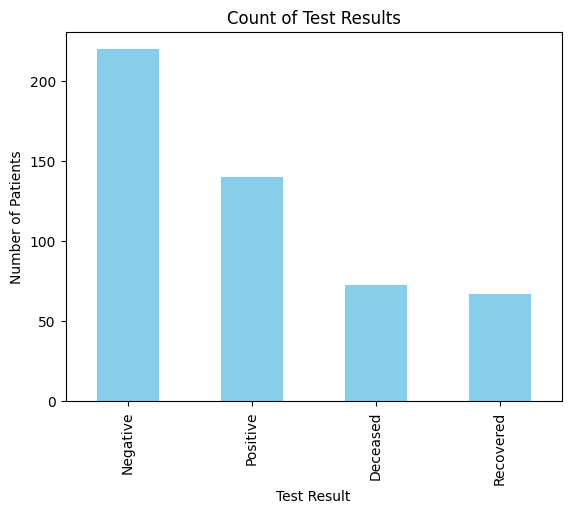

In [24]:
#Bar chart for Count of Test Results 
co_df['Test_Result'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Count of Test Results")
plt.xlabel("Test Result")
plt.ylabel("Number of Patients")
plt.show()


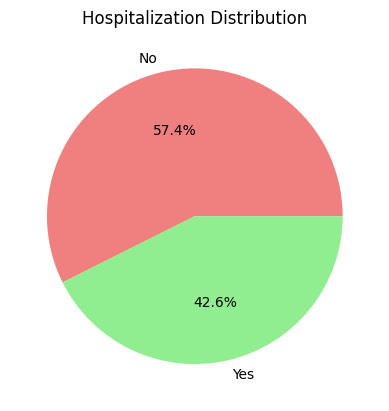

In [26]:
#Pie chart for Hospitalization Status
co_df['Hospitalized'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title("Hospitalization Distribution")
plt.ylabel("")
plt.show()


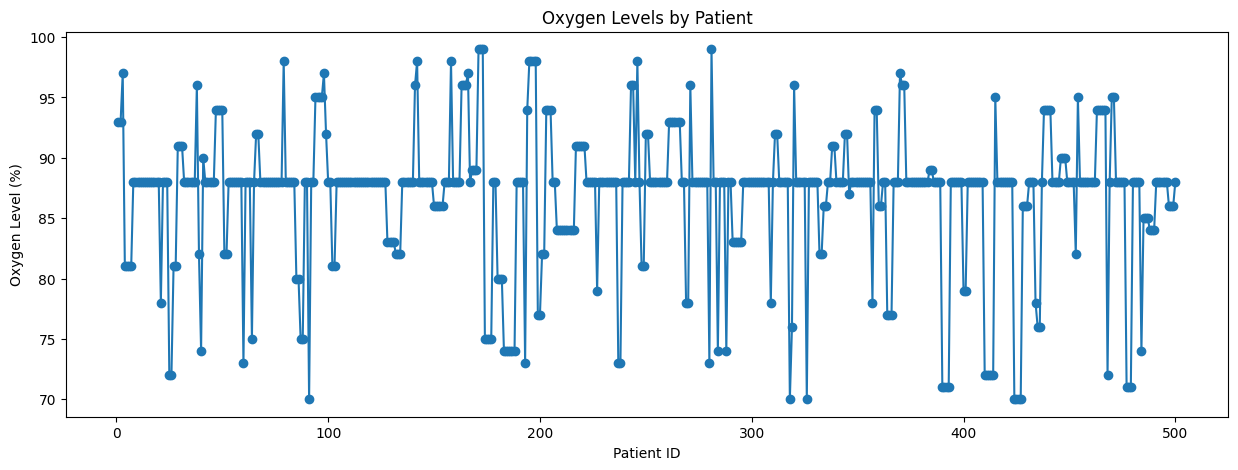

In [31]:
#Line chart for Oxygen Levels by Patient 
plt.figure(figsize=(15, 5))
plt.plot(co_df['Patient_ID'], co_df['Oxygen_Level'], marker='o')
plt.title("Oxygen Levels by Patient")
plt.xlabel("Patient ID")
plt.ylabel("Oxygen Level (%)")
plt.show()

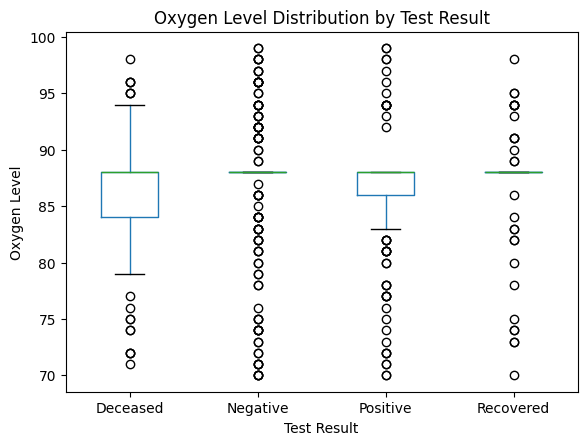

In [ ]:
#Boxplot for Oxygen Level by Test Result
co_df.boxplot(column='Oxygen_Level', by='Test_Result', grid=False)
plt.title("Oxygen Level Distribution by Test Result")
plt.suptitle("")  
plt.xlabel("Test Result")
plt.ylabel("Oxygen Level")
plt.show()

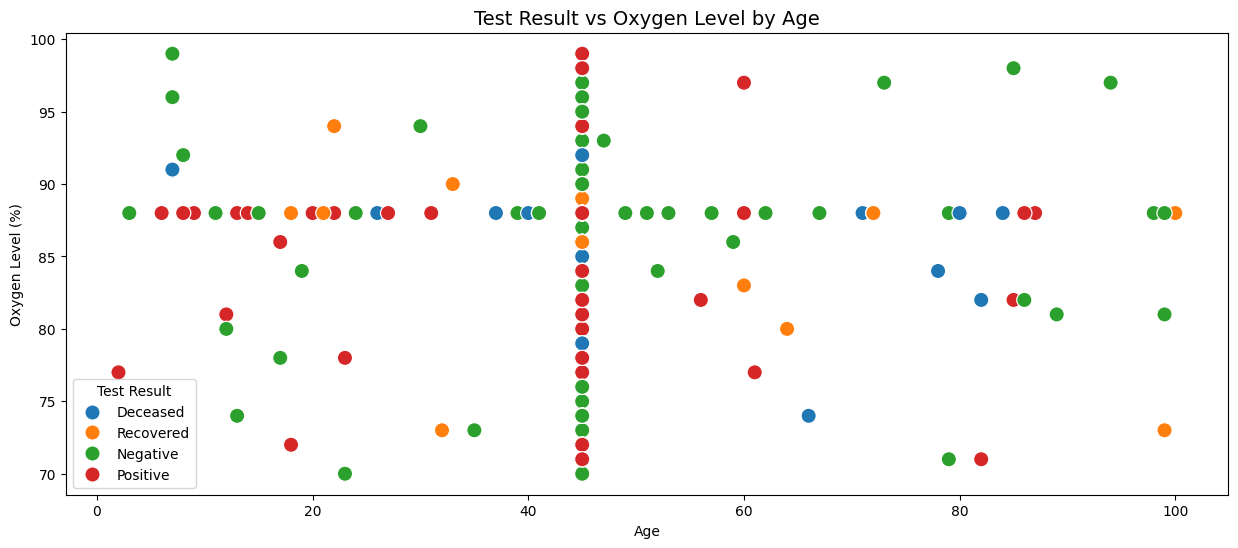

In [42]:
#Create combined scatter plot 
plt.figure(figsize=(15,6))
sns.scatterplot(
    data=co_df,
    x='Age',
    y='Oxygen_Level',
    hue='Test_Result',      
    s=120                      
)
plt.title("Test Result vs Oxygen Level by Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Oxygen Level (%)")
plt.legend(title="Test Result")
plt.show()